# Exploratory Data Analysis of Boston Crime
## Motivation

   In efforts to improve efficiency and overall performance of Boston first responders, Boston Crime data has been analyzed via exploratory data analysis methods to help answer some of the following questions: 

- Are there areas of that exhibit high crime rates, but lack the resources to respond to those crimes (police stations, fire stations, ect.)?
- Do certain hours of the day, days of the week, or months exhibit disproportional amounts of crime?
- How does crime differ by it's frequency?
- How does crime differ by it's type?
    
## Data
* Data on Boston crime incidents, location of police stations, locations of fire stations were aquired via Analyze Boston.
* Additionally, the data was subsetted by types of crimes with high frequency crimes (>4000), medium frequency (>4000 and >500), and low frequency crimes. 

In [76]:
import sys
import datetime
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pymysql
from IPython.display import clear_output,display
from IPython import display
from IPython.display import HTML
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
import bokeh

In [77]:
from bokeh.io import show, output_notebook, push_notebook, output_file
from bokeh.plotting import figure

from bokeh.plotting import figure
from bokeh.layouts import gridplot

from bokeh.models import CategoricalColorMapper, HoverTool, ColumnDataSource, Panel
from bokeh.models.widgets import CheckboxGroup, Slider, RangeSlider, Tabs, Select,RadioGroup, PreText

from bokeh.models import ColumnDataSource, Range1d, HoverTool
from bokeh.layouts import layout
from bokeh.palettes import Spectral3
from bokeh.tile_providers import CARTODBPOSITRON
from pyproj import Proj, transform 
from bokeh.plotting import figure, show, output_notebook
from bokeh.transform import factor_cmap
from bokeh.palettes import inferno

import math
from bokeh.palettes import Category20b_20

from bokeh.io import output_file, show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum

from bokeh.layouts import column, row, WidgetBox
from bokeh.palettes import Category20_16

from bokeh.application.handlers import FunctionHandler
from bokeh.application import Application
from bokeh.core.properties import value
from bokeh.io import show, output_file

from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

import warnings
warnings.filterwarnings('ignore')

output_notebook()

Loading BokehJS ...

In [78]:
mysqldb = pymysql.connect(host="127.0.0.1", user="root", password="nununini", database="boston_emergency_data")

try:
    cursor = mysqldb.cursor()
except:
    if err.errno == mysql.connector.errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
    elif err.errno == errorcode.ER_BAD_DV_ERROR:
        print("Database does not exist")
    else:
        print(err)

In [79]:
# query = ("UPDATE boston_crime_data SET OFFENSE_CODE_GROUP = 'Human Trafficking - Involuntary Servitude' WHERE OFFENSE_DESCRIPTION like 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE'")
# cursor.execute(query)


In [80]:
query = ("SELECT INCIDENT_NUMBER, OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,HOUR from boston_emergency_data.boston_crime_data WHERE INCIDENT_NUMBER IS NOT NULL")
ddf = pd.read_sql(query,mysqldb)
ddf['YEAR'] =  pd.to_datetime(ddf['OCCURRED_ON_DATE'], format='%Y-%b-%d %H:%M:%S').dt.year
ddf['MONTH'] =  pd.to_datetime(ddf['OCCURRED_ON_DATE'], format='%Y-%b-%d %H:%M:%S').dt.month
ddf['Date'] = ddf['MONTH'].astype(str) + ddf['YEAR'].astype(str)
ddf['Date'] = pd.to_datetime(ddf['Date'],format='%m%Y')

In [81]:
highFreqCrimes = ddf.groupby( by = 'OFFENSE_CODE_GROUP', group_keys = False, as_index= False).count()
highFreqCrimes = highFreqCrimes[highFreqCrimes.INCIDENT_NUMBER > 4000]

mediumFreqCrimes = ddf.groupby( by = 'OFFENSE_CODE_GROUP', group_keys = False, as_index= False).count()
mediumFreqCrimes = mediumFreqCrimes[(mediumFreqCrimes.INCIDENT_NUMBER > 500) & (mediumFreqCrimes.INCIDENT_NUMBER < 4000)]

lowFreqCrimes = ddf.groupby( by = 'OFFENSE_CODE_GROUP', group_keys = False, as_index= False).count()
lowFreqCrimes = lowFreqCrimes[lowFreqCrimes.INCIDENT_NUMBER < 500]

Text(0.5, 1.0, 'Low Frequency')

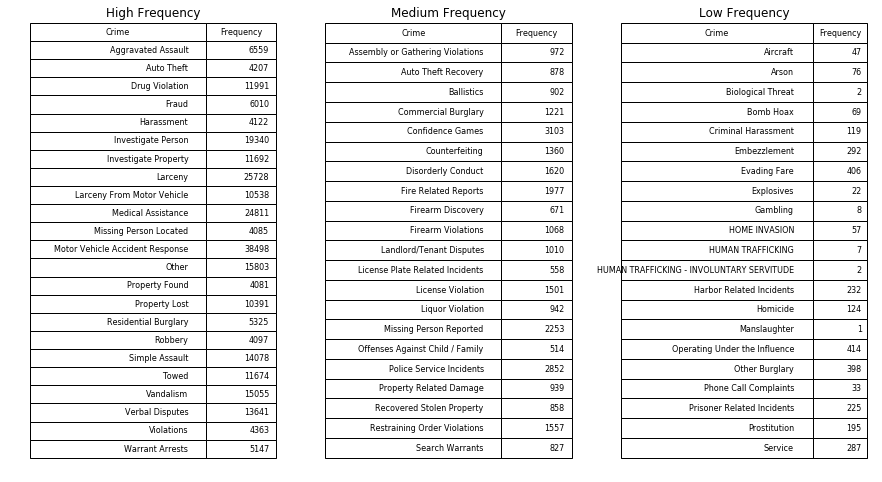

In [82]:
h_counts = pd.DataFrame()
h_counts['Crime'] = highFreqCrimes.OFFENSE_CODE_GROUP
h_counts['Frequency'] = highFreqCrimes.INCIDENT_NUMBER

m_counts = pd.DataFrame()
m_counts['Crime'] = mediumFreqCrimes.OFFENSE_CODE_GROUP
m_counts['Frequency'] = mediumFreqCrimes.INCIDENT_NUMBER

l_counts = pd.DataFrame()
l_counts['Crime'] = lowFreqCrimes.OFFENSE_CODE_GROUP
l_counts['Frequency'] = lowFreqCrimes.INCIDENT_NUMBER

fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(131)
font_size=8
bbox=[0, 0, 1, 1]
ax1.axis('off')
mpl_table = ax1.table(cellText = h_counts.values,colWidths = [1.25, 0.5], colLabels = h_counts.columns, bbox=bbox)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
ax1.set_title('High Frequency')

ax2 = fig.add_subplot(132)
ax2.axis('off')
font_size=8
bbox=[0, 0, 1, 1]
mpl_table = ax2.table(cellText = m_counts.values,colWidths = [1.25, 0.5], colLabels = m_counts.columns, bbox=bbox)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
ax2.set_title('Medium Frequency')

ax3 = fig.add_subplot(133)
ax3.axis('off')
font_size=8
bbox=[0, 0, 1, 1]
mpl_table = ax3.table(cellText = l_counts.values,colWidths = [2.5, 0.7], colLabels = l_counts.columns, bbox=bbox)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
ax3.set_title('Low Frequency')

In [83]:
highFreqCrimes1 = highFreqCrimes.reset_index(level=0, drop=True)
highFreqCrimes1 = list(highFreqCrimes1['OFFENSE_CODE_GROUP'])
highCrimes1 = ddf.loc[ddf['OFFENSE_CODE_GROUP'].isin(highFreqCrimes1)]
h_list = list(highCrimes1['OFFENSE_CODE_GROUP'].unique())
lowFreqCrimes1 = lowFreqCrimes.reset_index(level=0, drop=True)
lowFreqCrimes1 = list(lowFreqCrimes1['OFFENSE_CODE_GROUP'])
lowCrimes1 = ddf.loc[ddf['OFFENSE_CODE_GROUP'].isin(lowFreqCrimes1)]
l_list = list(lowCrimes1['OFFENSE_CODE_GROUP'].unique())
mediumFreqCrimes1 = mediumFreqCrimes.reset_index(level=0, drop=True)
mediumFreqCrimes1 = list(mediumFreqCrimes1['OFFENSE_CODE_GROUP'])
mediumCrimes1 = ddf.loc[ddf['OFFENSE_CODE_GROUP'].isin(mediumFreqCrimes1)]
m_list = list(mediumCrimes1['OFFENSE_CODE_GROUP'].unique())

In [84]:
 #query = ("ALTER TABLE boston_crime_data ADD FREQUENCY_TYPE VARCHAR(255)")
 #cursor.execute(query)

In [85]:
for offense in h_list:
    query = ("UPDATE boston_crime_data SET FREQUENCY_TYPE = 'high' WHERE OFFENSE_CODE_GROUP = '%s'"%offense)
    cursor.execute(query)
for offense in m_list:
    query = ("UPDATE boston_crime_data SET FREQUENCY_TYPE = 'medium' WHERE OFFENSE_CODE_GROUP = '%s'"%offense)
    cursor.execute(query)
for offense in l_list:
    query = ("UPDATE boston_crime_data SET FREQUENCY_TYPE = 'low' WHERE OFFENSE_CODE_GROUP = '%s'"%offense)
    cursor.execute(query)

In [86]:
query = ("SELECT FREQUENCY_TYPE,DAY_OF_WEEK, count(DAY_OF_WEEK) as Count from boston_emergency_data.boston_crime_data GROUP by DAY_OF_WEEK,FREQUENCY_TYPE")
df_dow = pd.read_sql(query,mysqldb)

df_dow_h = df_dow[df_dow['FREQUENCY_TYPE'] == 'high']
total_crime_h = sum(df_dow_h['Count'])
df_dow_h['Percentage'] = df_dow_h['Count'].apply(lambda x : (x/total_crime_h)*100)

df_dow_m = df_dow[df_dow['FREQUENCY_TYPE'] == 'medium']
total_crime_m = sum(df_dow_h['Count'])
df_dow_m['Percentage'] = df_dow_m['Count'].apply(lambda x : (x/total_crime_m)*100)

df_dow_l = df_dow[df_dow['FREQUENCY_TYPE'] == 'low']
total_crime_l =sum(df_dow_l['Count'])
df_dow_l['Percentage'] = df_dow_l['Count'].apply(lambda x : (x/total_crime_l)*100)



## Analyzing Crimes by Day of the Week
Crimes were analyzed over different days of the week. Below the picharts indicate the portion of crime comitted for each day of the week for high, medium, and low frequency crimes.
* Crimes do not seem to vary by day of the week.

In [87]:
dict_h = dict(zip(df_dow_h['DAY_OF_WEEK'].tolist(), df_dow_h['Percentage'].tolist()))
data = pd.Series(dict_h).reset_index(name='value').rename(columns={'index':'country'})
data['angle'] = data['value']/data['value'].sum() * 2*3.14
data['color'] = Category20c[len(dict_h)]

p1 = figure(plot_height=350, title="High Frequency Crimes WRT Day of Week", toolbar_location=None,
           tools="hover", tooltips="@country: @value", x_range=(-0.5, 1.0))

p1.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='country', source=data)

p1.axis.axis_label=None
p1.axis.visible=False
p1.grid.grid_line_color = None

dict_m = dict(zip(df_dow_m['DAY_OF_WEEK'].tolist(), df_dow_m['Percentage'].tolist()))
data = pd.Series(dict_m).reset_index(name='value').rename(columns={'index':'country'})
data['angle'] = data['value']/data['value'].sum() * 2*3.14
data['color'] = Category20c[len(dict_m)]

p2 = figure(plot_height=350, title="Medium Frequency Crimes WRT Day of Week", toolbar_location=None,
           tools="hover", tooltips="@country: @value", x_range=(-0.5, 1.0))

p2.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='country', source=data)

p2.axis.axis_label=None
p2.axis.visible=False
p2.grid.grid_line_color = None

dict_l = dict(zip(df_dow_l['DAY_OF_WEEK'].tolist(), df_dow_l['Percentage'].tolist()))
data = pd.Series(dict_l).reset_index(name='value').rename(columns={'index':'country'})
data['angle'] = data['value']/data['value'].sum() * 2*3.14
data['color'] = Category20c[len(dict_l)]

p3 = figure(plot_height=350, title="Low Frequency Crimes WRT Day of Week", toolbar_location=None,
           tools="hover", tooltips="@country: @value", x_range=(-0.5, 1.0))

p3.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='country', source=data)

p3.axis.axis_label=None
p3.axis.visible=False
p3.grid.grid_line_color = None


p = gridplot([[p1, p2 , p3]])
show(p)

## Analyzing Crimes Month by Month
Crimes were analyzed on a month by month basis over the past 6 years. Three heatmaps for high, medium, and low frequency crimes were made in order to see how crimes vary by month. Color intensity indicates the average amount of crimes for that month 
* Summer months (especially August) seem to consistently have a greater crime rate in all categories.
* Post 2017, medium and low frequency crimes seem to have dropped off (relativly), while high frequency crimes only intensified in rate.
* Winter months see a consistent decrease in crime for all categories. 

In [89]:
query = ("SELECT * from boston_crime_data where FREQUENCY_TYPE = 'high'")
ddf_h = pd.read_sql(query,mysqldb)

    
monthYear = ddf_h.sort_values('OCCURRED_ON_DATE')
monthYear['Year'] = monthYear.OCCURRED_ON_DATE.apply(lambda x: x.year)
monthYear['Day'] = monthYear.OCCURRED_ON_DATE.apply(lambda x: x.day)
monthYear['Month'] = monthYear.OCCURRED_ON_DATE.apply(lambda x: x.month)

monthYear = monthYear.groupby(["Year" ,"Month"]).count().reset_index()
monthYear = monthYear[["Year", "Month", "INCIDENT_NUMBER"]]


from bokeh.palettes import Spectral11, colorblind, Inferno, BuGn, brewer #Color options
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource,LinearColorMapper,BasicTicker, PrintfTickFormatter, ColorBar
TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom,tap"
hm1 = figure(title="Month-Year Heat Map For High Frequency Crimes", tools=TOOLS, toolbar_location='above',plot_width = 700,plot_height=500)

source = ColumnDataSource(monthYear)
colors = brewer['BuGn'][9]
colors = colors[::-1]
mapper = LinearColorMapper(
    palette=colors, low=monthYear.INCIDENT_NUMBER.min(), high=monthYear.INCIDENT_NUMBER.max())
hm1.rect(x="Year", y="Month",width=2,height=1,source = source,  
    fill_color={
        'field': 'INCIDENT_NUMBER',
        'transform': mapper
    },
    line_color=None)
color_bar = ColorBar(
    color_mapper=mapper,
    major_label_text_font_size="10pt",
    ticker=BasicTicker(desired_num_ticks=len(colors)),
    formatter=PrintfTickFormatter(),
    label_standoff=6,
    border_line_color=None,
    location=(0, 0))

hm1.add_layout(color_bar, 'right')
hm1.xaxis.axis_label = 'Year'
hm1.yaxis.axis_label = 'Month'
hm1.select_one(HoverTool).tooltips = [
    ('Year', '@Year'),('Month', '@Month'), ('Number of Crimes', '@INCIDENT_NUMBER')
]



In [90]:
query = ("SELECT * from boston_crime_data where FREQUENCY_TYPE = 'medium'")
ddf_h = pd.read_sql(query,mysqldb)

    
monthYear = ddf_h.sort_values('OCCURRED_ON_DATE')
monthYear['Year'] = monthYear.OCCURRED_ON_DATE.apply(lambda x: x.year)
monthYear['Day'] = monthYear.OCCURRED_ON_DATE.apply(lambda x: x.day)
monthYear['Month'] = monthYear.OCCURRED_ON_DATE.apply(lambda x: x.month)

monthYear = monthYear.groupby(["Year" ,"Month"]).count().reset_index()
monthYear = monthYear[["Year", "Month", "INCIDENT_NUMBER"]]


from bokeh.palettes import Spectral11, colorblind, Inferno, BuGn, brewer #Color options
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource,LinearColorMapper,BasicTicker, PrintfTickFormatter, ColorBar
TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom,tap"
hm2 = figure(title="Month-Year Heat Map For Medium Frequency Crimes", tools=TOOLS, toolbar_location='above',plot_width = 700,plot_height=500)

source = ColumnDataSource(monthYear)
colors = brewer['Blues'][9]
colors = colors[::-1]
mapper = LinearColorMapper(
    palette=colors, low=monthYear.INCIDENT_NUMBER.min(), high=monthYear.INCIDENT_NUMBER.max())
hm2.rect(x="Year", y="Month",width=2,height=1,source = source,  
    fill_color={
        'field': 'INCIDENT_NUMBER',
        'transform': mapper
    },
    line_color=None)
color_bar = ColorBar(
    color_mapper=mapper,
    major_label_text_font_size="10pt",
    ticker=BasicTicker(desired_num_ticks=len(colors)),
    formatter=PrintfTickFormatter(),
    label_standoff=6,
    border_line_color=None,
    location=(0, 0))

hm2.add_layout(color_bar, 'right')
hm2.xaxis.axis_label = 'Year'
hm2.yaxis.axis_label = 'Month'
hm2.select_one(HoverTool).tooltips = [
    ('Year', '@Year'),('Month', '@Month'), ('Number of Crimes', '@INCIDENT_NUMBER')
]



In [91]:
query = ("SELECT * from boston_crime_data where FREQUENCY_TYPE = 'low'")
ddf_h = pd.read_sql(query,mysqldb)

    
monthYear = ddf_h.sort_values('OCCURRED_ON_DATE')
monthYear['Year'] = monthYear.OCCURRED_ON_DATE.apply(lambda x: x.year)
monthYear['Day'] = monthYear.OCCURRED_ON_DATE.apply(lambda x: x.day)
monthYear['Month'] = monthYear.OCCURRED_ON_DATE.apply(lambda x: x.month)

monthYear = monthYear.groupby(["Year" ,"Month"]).count().reset_index()
monthYear = monthYear[["Year", "Month", "INCIDENT_NUMBER"]]


from bokeh.palettes import Spectral11, colorblind, Inferno, BuGn, brewer #Color options
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource,LinearColorMapper,BasicTicker, PrintfTickFormatter, ColorBar
TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom,tap"
hm3 = figure(title="Month-Year Heat Map For Low Frequency Crimes", tools=TOOLS, toolbar_location='above',plot_width = 700,plot_height=500)

source = ColumnDataSource(monthYear)
colors = brewer['PuRd'][9]
colors = colors[::-1]
mapper = LinearColorMapper(
    palette=colors, low=monthYear.INCIDENT_NUMBER.min(), high=monthYear.INCIDENT_NUMBER.max())
hm3.rect(x="Year", y="Month",width=2,height=1,source = source,  
    fill_color={
        'field': 'INCIDENT_NUMBER',
        'transform': mapper
    },
    line_color=None)
color_bar = ColorBar(
    color_mapper=mapper,
    major_label_text_font_size="10pt",
    ticker=BasicTicker(desired_num_ticks=len(colors)),
    formatter=PrintfTickFormatter(),
    label_standoff=6,
    border_line_color=None,
    location=(0, 0))

hm3.add_layout(color_bar, 'right')
hm3.xaxis.axis_label = 'Year'
hm3.yaxis.axis_label = 'Month'
hm3.select_one(HoverTool).tooltips = [
    ('Year', '@Year'),('Month', '@Month'), ('Number of Crimes', '@INCIDENT_NUMBER')
]


p = gridplot([[hm1, hm2 , hm3]])
show(p)

## Analyzing Crimes by Hour of the Day
Crimes were analyzed over a 24 hour period. Three interactive histograms for high, medium, and low frequency crimes were made in order to see how crimes vary by hour of the day. 
* High frequency crimes:
    * Most tended to skew during the afternoon and evening.
    * Specifically, crimes involving drug violations have a significant spike between 4PM - 8PM 
    * Towed violations has an overwhelming skew between 8AM and Lunch time
* Miedum frequency crimes: 
    * Tended to skew towards mid day
    * Not as predictable as high frequency crimes
* Low frequency crimes:
    * Had more outliers (Biological threats, human trafficking, etc.)
    * Intuition holds for the rest (i.e. we expect offenses such as driving under the influence happen during fringe hour of the day).
    

In [92]:
highFreqCrimes1 = highFreqCrimes.reset_index(level=0, drop=True)
highFreqCrimes1 = list(highFreqCrimes1['OFFENSE_CODE_GROUP'])
highCrimes1 = ddf.loc[ddf['OFFENSE_CODE_GROUP'].isin(highFreqCrimes1)]
available_hf_crimes1 = list(highCrimes1['OFFENSE_CODE_GROUP'].unique())
available_hf_crimes1 = sorted(available_hf_crimes1)
def modify_doc(doc):
    
    def make_dataset(crime_list, range_start = 0, range_end = 24, bin_width = 1):
        
        by_crime = pd.DataFrame(columns=['frequency', 'left', 'right', 'f_frequency', 'f_interval','name', 'color'])
        range_extent = range_end - range_start
        
        # Iterate through all the crimes
        for i, crime_name in enumerate(crime_list):
            
            # Subset to the crime
            subset = highCrimes1[highCrimes1['OFFENSE_CODE_GROUP'] == crime_name]
            
            # Create a histogram with 1 Hour bins
            arr_hist, edges = np.histogram(subset['HOUR'], 
                                           bins = int(range_extent / bin_width), 
                                           range = [range_start, range_end])
            
            # Divide the counts by the total to get a frequency and create df
            arr_df = pd.DataFrame({'frequency': arr_hist / np.sum(arr_hist), 'left': edges[:-1], 'right': edges[1:] })
            
            # Format the frequency 
            arr_df['f_frequency'] = ['%0.5f' % frequency for frequency in arr_df['frequency']]
            
            # Format the interval
            arr_df['f_interval'] = ['%d to %d Hour' % (left, right) for left, right in zip(arr_df['left'], arr_df['right'])]
            
            # Assign the crime for labels
            arr_df['name'] = crime_name

            # Color each crime differently
            arr_df['color'] = Category20_16[i]

            # Add to the overall dataframe
            by_crime = by_crime.append(arr_df)
            
        # Overall dataframe
        by_crime = by_crime.sort_values(['name', 'left'])

        return ColumnDataSource(by_crime)
    
    def style(p):
        # Title 
        p.title.align = 'center'
        p.title.text_font_size = '20pt'
        p.title.text_font = 'serif'

        # Axis titles
        p.xaxis.axis_label_text_font_size = '14pt'
        p.xaxis.axis_label_text_font_style = 'bold'
        p.yaxis.axis_label_text_font_size = '14pt'
        p.yaxis.axis_label_text_font_style = 'bold'

        # Tick labels
        p.xaxis.major_label_text_font_size = '12pt'
        p.yaxis.major_label_text_font_size = '12pt'

        return p
    
    def make_plot(src):
        # Blank plot with correct labels
        p = figure(plot_width = 700, plot_height = 700, 
                  title = 'High Frequency Crime Type Histogram',
                  x_axis_label = 'Hour of Day', y_axis_label = 'Relative Frequency')
        
        # Quad glyphs to create a histogram
        p.quad(source = src, bottom = 0, top = 'frequency', left = 'left', right = 'right',
               color = 'color', fill_alpha = 0.7, hover_fill_color = 'color', legend = 'name',
               hover_fill_alpha = 1.0, line_color = 'black')


        
        # Hover tool with vline mode
        hover = HoverTool(tooltips=[('Crime', '@name'), 
                                    ('Hour', '@f_interval'),
                                    ('frequency', '@f_frequency')],
                          mode='vline')

        p.add_tools(hover)
        
        # Styling
        p = style(p)

        return p
    
    def update(attr, old, new):
        
        crimes_to_plot = [crime_selection.labels[i] for i in crime_selection.active]
        
        new_src = make_dataset(crimes_to_plot,
                               range_start = range_select.value[0],
                               range_end = range_select.value[1],
                               bin_width = binwidth_select.value)

        src.data.update(new_src.data)
    
    
    crime_selection = CheckboxGroup(labels=available_hf_crimes1, active = [0, 1,6,15,17,21])
    crime_selection.on_change('active', update)
    
    binwidth_select = Slider(start = 0, end = 24, 
                         step = 1, value = 1,
                         title = 'Hour Width')
    binwidth_select.on_change('value', update)
    
    range_select = RangeSlider(start = 0, end = 24, value = (0, 24),
                               step = 1, title = 'Hour Range')
    range_select.on_change('value', update)
    
    initial_crimes = [crime_selection.labels[i] for i in crime_selection.active]
    
    src = make_dataset(initial_crimes,
                      range_start = range_select.value[0],
                      range_end = range_select.value[1],
                      bin_width = binwidth_select.value)
    
    p = make_plot(src)
    
    # Put controls in a single element
    controls = WidgetBox(crime_selection, binwidth_select, range_select)
    
    # Create a row layout
    layout = row(controls, p)
    
    doc.add_root(layout)
    
# Set up an application
handler = FunctionHandler(modify_doc)
app = Application(handler)
show(app)

In [93]:
mediumFreqCrimes1 = mediumFreqCrimes.reset_index(level=0, drop=True)
mediumFreqCrimes1 = list(mediumFreqCrimes1['OFFENSE_CODE_GROUP'])
mediumCrimes1 = ddf.loc[ddf['OFFENSE_CODE_GROUP'].isin(mediumFreqCrimes1)]
available_mf_crimes1 = list(mediumCrimes1['OFFENSE_CODE_GROUP'].unique())
available_mf_crimes1 = sorted(available_mf_crimes1)
def modify_doc(doc):
    
    def make_dataset(crime_list, range_start = 0, range_end = 24, bin_width = 1):
        
        by_crime = pd.DataFrame(columns=['frequency', 'left', 'right', 'f_frequency', 'f_interval','name', 'color'])
        range_extent = range_end - range_start
        
        # Iterate through all the crimes
        for i, crime_name in enumerate(crime_list):
            
            # Subset to the crime
            subset = mediumCrimes1[mediumCrimes1['OFFENSE_CODE_GROUP'] == crime_name]
            
            # Create a histogram with 1 Hour bins
            arr_hist, edges = np.histogram(subset['HOUR'], 
                                           bins = int(range_extent / bin_width), 
                                           range = [range_start, range_end])
            
            # Divide the counts by the total to get a frequency and create df
            arr_df = pd.DataFrame({'frequency': arr_hist / np.sum(arr_hist), 'left': edges[:-1], 'right': edges[1:] })
            
            # Format the frequency 
            arr_df['f_frequency'] = ['%0.5f' % frequency for frequency in arr_df['frequency']]
            
            # Format the interval
            arr_df['f_interval'] = ['%d to %d Hour' % (left, right) for left, right in zip(arr_df['left'], arr_df['right'])]
            
            # Assign the crime for labels
            arr_df['name'] = crime_name

            # Color each crime differently
            arr_df['color'] = Category20_16[i]

            # Add to the overall dataframe
            by_crime = by_crime.append(arr_df)
            
        # Overall dataframe
        by_crime = by_crime.sort_values(['name', 'left'])

        return ColumnDataSource(by_crime)
    
    def style(p):
        # Title 
        p.title.align = 'center'
        p.title.text_font_size = '20pt'
        p.title.text_font = 'serif'

        # Axis titles
        p.xaxis.axis_label_text_font_size = '14pt'
        p.xaxis.axis_label_text_font_style = 'bold'
        p.yaxis.axis_label_text_font_size = '14pt'
        p.yaxis.axis_label_text_font_style = 'bold'

        # Tick labels
        p.xaxis.major_label_text_font_size = '12pt'
        p.yaxis.major_label_text_font_size = '12pt'

        return p
    
    def make_plot(src):
        # Blank plot with correct labels
        p = figure(plot_width = 700, plot_height = 700, 
                  title = 'Medium Frequency Crime Type Histogram',
                  x_axis_label = 'Hour of Day', y_axis_label = 'Relative Frequency')
        
        # Quad glyphs to create a histogram
        p.quad(source = src, bottom = 0, top = 'frequency', left = 'left', right = 'right',
               color = 'color', fill_alpha = 0.7, hover_fill_color = 'color', legend = 'name',
               hover_fill_alpha = 1.0, line_color = 'black')


        
        # Hover tool with vline mode
        hover = HoverTool(tooltips=[('Crime', '@name'), 
                                    ('Hour', '@f_interval'),
                                    ('frequency', '@f_frequency')],
                          mode='vline')

        p.add_tools(hover)
        
        # Styling
        p = style(p)

        return p
    
    def update(attr, old, new):
        
        crimes_to_plot = [crime_selection.labels[i] for i in crime_selection.active]
        
        new_src = make_dataset(crimes_to_plot,
                               range_start = range_select.value[0],
                               range_end = range_select.value[1],
                               bin_width = binwidth_select.value)

        src.data.update(new_src.data)
    
    
    crime_selection = CheckboxGroup(labels=available_mf_crimes1, active = [0, 1])
    crime_selection.on_change('active', update)
    
    binwidth_select = Slider(start = 0, end = 24, 
                         step = 1, value = 1,
                         title = 'Hour Width')
    binwidth_select.on_change('value', update)
    
    range_select = RangeSlider(start = 0, end = 24, value = (0, 24),
                               step = 1, title = 'Hour Range')
    range_select.on_change('value', update)
    
    initial_crimes = [crime_selection.labels[i] for i in crime_selection.active]
    
    src = make_dataset(initial_crimes,
                      range_start = range_select.value[0],
                      range_end = range_select.value[1],
                      bin_width = binwidth_select.value)
    
    p = make_plot(src)
    
    # Put controls in a single element
    controls = WidgetBox(crime_selection, binwidth_select, range_select)
    
    # Create a row layout
    layout = row(controls, p)
    
    doc.add_root(layout)
    
# Set up an application
handler = FunctionHandler(modify_doc)
app = Application(handler)
show(app)

In [94]:
lowFreqCrimes1 = lowFreqCrimes.reset_index(level=0, drop=True)
lowFreqCrimes1 = list(lowFreqCrimes1['OFFENSE_CODE_GROUP'])
lowCrimes1 = ddf.loc[ddf['OFFENSE_CODE_GROUP'].isin(lowFreqCrimes1)]
available_lf_crimes1 = list(lowCrimes1['OFFENSE_CODE_GROUP'].unique())
available_lf_crimes1 = sorted(available_lf_crimes1)
def modify_doc(doc):
    
    def make_dataset(crime_list, range_start = 0, range_end = 24, bin_width = 1):
        
        by_crime = pd.DataFrame(columns=['frequency', 'left', 'right', 'f_frequency', 'f_interval','name', 'color'])
        range_extent = range_end - range_start
        
        # Iterate through all the crimes
        for i, crime_name in enumerate(crime_list):
            
            # Subset to the crime
            subset = lowCrimes1[lowCrimes1['OFFENSE_CODE_GROUP'] == crime_name]
            
            # Create a histogram with 1 Hour bins
            arr_hist, edges = np.histogram(subset['HOUR'], 
                                           bins = int(range_extent / bin_width), 
                                           range = [range_start, range_end])
            
            # Divide the counts by the total to get a frequency and create df
            arr_df = pd.DataFrame({'frequency': arr_hist / np.sum(arr_hist), 'left': edges[:-1], 'right': edges[1:] })
            
            # Format the frequency 
            arr_df['f_frequency'] = ['%0.5f' % frequency for frequency in arr_df['frequency']]
            
            # Format the interval
            arr_df['f_interval'] = ['%d to %d Hour' % (left, right) for left, right in zip(arr_df['left'], arr_df['right'])]
            
            # Assign the crime for labels
            arr_df['name'] = crime_name

            # Color each crime differently
            arr_df['color'] = Category20_16[i]

            # Add to the overall dataframe
            by_crime = by_crime.append(arr_df)
            
        # Overall dataframe
        by_crime = by_crime.sort_values(['name', 'left'])

        return ColumnDataSource(by_crime)
    
    def style(p):
        # Title 
        p.title.align = 'center'
        p.title.text_font_size = '20pt'
        p.title.text_font = 'serif'

        # Axis titles
        p.xaxis.axis_label_text_font_size = '14pt'
        p.xaxis.axis_label_text_font_style = 'bold'
        p.yaxis.axis_label_text_font_size = '14pt'
        p.yaxis.axis_label_text_font_style = 'bold'

        # Tick labels
        p.xaxis.major_label_text_font_size = '12pt'
        p.yaxis.major_label_text_font_size = '12pt'

        return p
    
    def make_plot(src):
        # Blank plot with correct labels
        p = figure(plot_width = 700, plot_height = 700, 
                  title = 'Low Frequency Crime Type Histogram',
                  x_axis_label = 'Hour of Day', y_axis_label = 'Relative Frequency')
        
        # Quad glyphs to create a histogram
        p.quad(source = src, bottom = 0, top = 'frequency', left = 'left', right = 'right',
               color = 'color', fill_alpha = 0.7, hover_fill_color = 'color', legend = 'name',
               hover_fill_alpha = 1.0, line_color = 'black')


        
        # Hover tool with vline mode
        hover = HoverTool(tooltips=[('Crime', '@name'), 
                                    ('Hour', '@f_interval'),
                                    ('frequency', '@f_frequency')],
                          mode='vline')

        p.add_tools(hover)
        
        # Styling
        p = style(p)

        return p
    
    def update(attr, old, new):
        
        crimes_to_plot = [crime_selection.labels[i] for i in crime_selection.active]
        
        new_src = make_dataset(crimes_to_plot,
                               range_start = range_select.value[0],
                               range_end = range_select.value[1],
                               bin_width = binwidth_select.value)

        src.data.update(new_src.data)
    
    
    crime_selection = CheckboxGroup(labels=available_lf_crimes1, active = [0, 1])
    crime_selection.on_change('active', update)
    
    binwidth_select = Slider(start = 0, end = 24, 
                         step = 1, value = 1,
                         title = 'Hour Width')
    binwidth_select.on_change('value', update)
    
    range_select = RangeSlider(start = 0, end = 24, value = (0, 24),
                               step = 1, title = 'Hour Range')
    range_select.on_change('value', update)
    
    initial_crimes = [crime_selection.labels[i] for i in crime_selection.active]
    
    src = make_dataset(initial_crimes,
                      range_start = range_select.value[0],
                      range_end = range_select.value[1],
                      bin_width = binwidth_select.value)
    
    p = make_plot(src)
    
    # Put controls in a single element
    controls = WidgetBox(crime_selection, binwidth_select, range_select)
    
    # Create a row layout
    layout = row(controls, p)
    
    doc.add_root(layout)
    
# Set up an application
handler = FunctionHandler(modify_doc)
app = Application(handler)
show(app)

## Analyzing Crimes by Location
Crimes segregated by type are marked on the map, areas with a proportion of that crime type are more intense in that crime type's associated color. Additionally, response stations are boldly marked.

In [95]:
police_station_query = ("SELECT Lat, Lng, ZIP_CODE from boston_emergency_data.Boston_Police_Stations")
police_stations_frame = pd.read_sql(police_station_query,mysqldb)
police_stations_frame = police_stations_frame.convert_objects(convert_numeric=True)

In [96]:
def merc(Coords):
    lat = Coords[0]
    lon = Coords[1]
    
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale
    return x, y

police_stations_frame['merc_x'], police_stations_frame['merc_y'] = ([merc((lat,lon))[i] for lat, lon in zip(police_stations_frame.Lat, police_stations_frame.Lng)] for i in range(2))
police_stations_frame.head()

#len(offence_group_frame.OFFENSE_CODE_GROUP.unique())
colors = ["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
"#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
"#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
"#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
"#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
"#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
"#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
"#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C"]
#len(colors)

query = ("SELECT INCIDENT_NUMBER, OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,HOUR, Lat, Lng,STREET from boston_emergency_data.boston_crime_data WHERE INCIDENT_NUMBER IS NOT NULL AND Lat != 0 AND FREQUENCY_TYPE = 'high' LIMIT 20000")
offence_group_frame = pd.read_sql(query,mysqldb)
offence_group_frame['merc_x'], offence_group_frame['merc_y'] = ([merc((lat,lon))[i] for lat, lon in zip(offence_group_frame.Lat, offence_group_frame.Lng)] for i in range(2))
offence_source = ColumnDataSource(offence_group_frame)

group_list = offence_group_frame.OFFENSE_CODE_GROUP.unique()
color_mapper = dict(zip(group_list, colors))

source = ColumnDataSource(police_stations_frame)
merc_x_range = [a(police_stations_frame.merc_x) for a in [min,max]]
merc_y_range = [a(police_stations_frame.merc_y) for a in [min,max]]
merc_x_range
merc_y_range


p = figure(x_range=merc_x_range, y_range=merc_y_range, x_axis_type="mercator", y_axis_type="mercator", plot_width=900, plot_height=700, title = "High Frequency Crime Locations")
p.add_tile(CARTODBPOSITRON)

#index_cmap = factor_cmap('city', palette=inferno(len(police_stations_frame.Lat.unique())), factors=as.string(sorted(police_stations_frame.Lat.unique())), end=1)
index_cmap = factor_cmap('OFFENSE_CODE_GROUP', palette = colors, factors=(offence_group_frame.OFFENSE_CODE_GROUP.unique()), end=1)
#color_mapper = CategoricalColorMapper(factors=['hi', 'lo'], palette=[RdBu3[2], RdBu3[0]])

p.circle(source=source, x='merc_x', y='merc_y',fill_color='green', radius=100)
p.circle(source=offence_source, x='merc_x', y='merc_y', color=index_cmap, radius=75, alpha = 0.4, legend = 'OFFENSE_CODE_GROUP')
p.circle(source=source, x='merc_x', y='merc_y', fill_color='blue', fill_alpha=0.2, radius=500)

p.legend.location = (0,-60)
p.legend.click_policy="hide"

p.add_tools(HoverTool(tooltips=[("Latiture", "@Lat"), ("Longitude", "@Lng"), ("Offense", "@OFFENSE_CODE_GROUP"), ("Street", "@STREET")]))
show(p)

In [97]:
police_stations_frame['merc_x'], police_stations_frame['merc_y'] = ([merc((lat,lon))[i] for lat, lon in zip(police_stations_frame.Lat, police_stations_frame.Lng)] for i in range(2))
police_stations_frame.head()

query = ("SELECT INCIDENT_NUMBER, OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,HOUR, Lat, Lng,STREET from boston_emergency_data.boston_crime_data WHERE INCIDENT_NUMBER IS NOT NULL AND Lat != 0 AND FREQUENCY_TYPE = 'medium' LIMIT 20000")
offence_group_frame = pd.read_sql(query,mysqldb)
offence_group_frame['merc_x'], offence_group_frame['merc_y'] = ([merc((lat,lon))[i] for lat, lon in zip(offence_group_frame.Lat, offence_group_frame.Lng)] for i in range(2))
offence_source = ColumnDataSource(offence_group_frame)

source = ColumnDataSource(police_stations_frame)
merc_x_range = [a(police_stations_frame.merc_x) for a in [min,max]]
merc_y_range = [a(police_stations_frame.merc_y) for a in [min,max]]
merc_x_range
merc_y_range


p = figure(x_range=merc_x_range, y_range=merc_y_range, x_axis_type="mercator", y_axis_type="mercator", plot_width=900, plot_height=700, title = "Medium Frequency Crime Locations")
p.add_tile(CARTODBPOSITRON)

#index_cmap = factor_cmap('city', palette=inferno(len(police_stations_frame.Lat.unique())), factors=as.string(sorted(police_stations_frame.Lat.unique())), end=1)
index_cmap = factor_cmap('OFFENSE_CODE_GROUP', palette = colors, factors=(offence_group_frame.OFFENSE_CODE_GROUP.unique()), end=1)
#color_mapper = CategoricalColorMapper(factors=['hi', 'lo'], palette=[RdBu3[2], RdBu3[0]])

p.circle(source=source, x='merc_x', y='merc_y',fill_color='green', radius=100)
p.circle(source=offence_source, x='merc_x', y='merc_y', color=index_cmap, radius=75, alpha = 0.4, legend = 'OFFENSE_CODE_GROUP')
p.circle(source=source, x='merc_x', y='merc_y', fill_color='blue', fill_alpha=0.2, radius=500)

p.legend.location = (0,-60)
p.legend.click_policy="hide"

p.add_tools(HoverTool(tooltips=[("Latiture", "@Lat"), ("Longitude", "@Lng"), ("Offense", "@OFFENSE_CODE_GROUP"), ("Street", "@STREET")]))
show(p)

In [98]:
police_stations_frame['merc_x'], police_stations_frame['merc_y'] = ([merc((lat,lon))[i] for lat, lon in zip(police_stations_frame.Lat, police_stations_frame.Lng)] for i in range(2))
police_stations_frame.head()

query = ("SELECT INCIDENT_NUMBER, OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,HOUR, Lat, Lng,STREET from boston_emergency_data.boston_crime_data WHERE INCIDENT_NUMBER IS NOT NULL AND Lat != 0 AND FREQUENCY_TYPE = 'low' LIMIT 20000")
offence_group_frame = pd.read_sql(query,mysqldb)
offence_group_frame['merc_x'], offence_group_frame['merc_y'] = ([merc((lat,lon))[i] for lat, lon in zip(offence_group_frame.Lat, offence_group_frame.Lng)] for i in range(2))
offence_source = ColumnDataSource(offence_group_frame)

source = ColumnDataSource(police_stations_frame)
merc_x_range = [a(police_stations_frame.merc_x) for a in [min,max]]
merc_y_range = [a(police_stations_frame.merc_y) for a in [min,max]]
merc_x_range
merc_y_range


p = figure(x_range=merc_x_range, y_range=merc_y_range, x_axis_type="mercator", y_axis_type="mercator", plot_width=900, plot_height=700, title = "Low Frequency Crime Locations")
p.add_tile(CARTODBPOSITRON)

#index_cmap = factor_cmap('city', palette=inferno(len(police_stations_frame.Lat.unique())), factors=as.string(sorted(police_stations_frame.Lat.unique())), end=1)
index_cmap = factor_cmap('OFFENSE_CODE_GROUP', palette = colors, factors=(offence_group_frame.OFFENSE_CODE_GROUP.unique()), end=1)
#color_mapper = CategoricalColorMapper(factors=['hi', 'lo'], palette=[RdBu3[2], RdBu3[0]])

p.circle(source=source, x='merc_x', y='merc_y',fill_color='green', radius=100)
p.circle(source=offence_source, x='merc_x', y='merc_y', color=index_cmap, radius=75, alpha = 0.4, legend = 'OFFENSE_CODE_GROUP')
p.circle(source=source, x='merc_x', y='merc_y', fill_color='blue', fill_alpha=0.2, radius=500)

p.legend.location = (0,-60)
p.legend.click_policy="hide"

p.add_tools(HoverTool(tooltips=[("Latiture", "@Lat"), ("Longitude", "@Lng"), ("Offense", "@OFFENSE_CODE_GROUP"), ("Street", "@STREET")]))
show(p)

## Analyzing Crimes by Offense Discription
The oddense discription is a more detailed set of information on the nature of the crime type, for instance operating under the influence can be further categorized by operating under the influence of alcohol or drugs.

In [99]:
query = ("SELECT INCIDENT_NUMBER, OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,HOUR from boston_emergency_data.boston_crime_data WHERE INCIDENT_NUMBER IS NOT NULL")
ddf_2 = pd.read_sql(query,mysqldb)
ddf_2.set_index('INCIDENT_NUMBER', inplace=True)

available_crimes = ddf_2['OFFENSE_CODE_GROUP'].unique().tolist()
available_crimes.insert(0, 'Choose Offense')

In [101]:
def diss(abc):
    clear_output(wait = True)
    disss(abc)

def disss(abc):
    
    handler = FunctionHandler(modify_doc)
    app = Application(handler)
    show(app)
    make_plot(abc)
   
def make_plot(crime):
    subset = ddf_2[ddf_2['OFFENSE_CODE_GROUP'] == crime]
    subset2 = subset.groupby(['OFFENSE_DESCRIPTION']).count()
    
    crimes = subset2.index.tolist()
    counts = subset2['OFFENSE_CODE_GROUP'].values
    
    

    p = figure(x_range=crimes, plot_height=500,plot_width=900, title=crime)
    p.vbar(x=crimes, top=counts, width=0.9)
    p.xaxis.major_label_orientation = math.pi/2
    p.xgrid.grid_line_color = None
    p.y_range.start = 0

    show(p)
       
       
def modify_doc(doc):
    
    
    def update(attr, old, new):
        
        crimes_to_plot = crime_selection.value
        diss(crimes_to_plot)
        
    
    
    crime_selection = Select(options=available_crimes)
    crime_selection.on_change('value', update)
    
    initial_crimes = crime_selection
    
    
    # Put controls in a single element
    controls = WidgetBox(crime_selection)
    
    # Create a row layout
    layout = row(controls)
    
    # Make a tab with the layout
    
    doc.add_root(layout)
    
# Set up an application
handler = FunctionHandler(modify_doc)
app = Application(handler)
show(app)

## Future Work
#### In the future, these results can be employed when assessing: 

* Where new police stations should be built by analyzing areas with higher crime rates, but lack police stations. 
* How frequently should officers go on patrols by looking at temporal data.  

#### Extend results to 911 operators:

*  We can assess the need for operators by analyzing how crime varies temporally

#### Extending project analysis:

* Creating a predictive model depending on the geographical and temporal data, the caller can be immediatly transfered to an operator with the exerpeience and resources tailored to the callers need.
* Extend analysis to fire stations and assessing incidents that require the fire department.

In [102]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')